# Predicting car prices

In this project we're going to predict car prices on Craigslist, using csv-dataset we found on Kaggle.

## Preprocessing

So, first of all, let's explore what valuables the dataset has and take a first glance at our data by displaying first 5 rows.

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

# loading the CSV data
cars = pd.read_csv(
    "C:/Users/SLunev/Desktop/TABD/vehicles.csv")

# displaying first 5 rows
pd.options.display.max_columns = None
print(f'The shape of dataset: {cars.shape}')
display(cars.head())

The shape of dataset: (458213, 26)


,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,1G1YU3DW1A5106980,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,5NPEC4AB0EH813529,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,NaN,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,NaN,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


It seems that we have one **Unnamed: 0** column, which is a duplicate of index. It is completely useless, so let's delete it.

In [145]:
cars = cars.drop(labels = ['Unnamed: 0'], axis = 1)

cars.head(2)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,1G1YU3DW1A5106980,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.5900,-85.4800,2020-12-02T08:11:30-0600
1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,5NPEC4AB0EH813529,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.5475,-85.4682,2020-12-02T02:11:50-0600


Also, we don't need columns with URL's, **VIN**, **lat**, **long** and **id** because they doesn't help us in prediction car prices, so let's delete them as well.

In [146]:
cars = cars.drop(labels = ['url', 'region_url', 'VIN', 'lat', 'long', 'id', 'image_url'], axis = 1)

cars.head(1)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state,posting_date
0,auburn,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,rwd,NaN,other,NaN,Carvana is the safer way to buy a car During t...,al,2020-12-02T08:11:30-0600


Besides, we saw in columns **size** and **paint_color** missing values. Let's inspect, maybe this dataset has much more of them. In the table below there is a percentage of missing values in each column.

In [147]:
num_rows = len(cars)
display(cars.isna().sum()*100/num_rows)

region           0.000000
price            0.000000
year             0.229151
manufacturer     3.976317
model            1.057587
condition       42.107055
cylinders       37.349442
fuel             0.706440
odometer        12.069278
title_status     0.562402
transmission     0.532940
drive           29.285070
size            70.130703
type            24.603841
paint_color     30.737452
description      0.015277
state            0.000000
posting_date     0.006111
dtype: float64

Basically, we have 3 ways of dealing with missing data:

1. Drop rows with NaNs

2. Fill NaNs with mean, median, or using more sofisticated algorithms

3. Delete whole columns with NaNs

Because we have a lot of data, for columns that have less than 40% of missing data, we will just delete rows with NaNs. It is necessary for computing purposes, otherwise it may take +100500 years to calculate some algorithms.

In [148]:
cars_1 = cars.dropna(subset = ['year', 'cylinders', 'odometer', 'drive', 'type', 'paint_color', 'manufacturer', 'model', 'fuel', 'title_status', 'transmission', 'description', 'posting_date'])

cars_1.shape

(178409, 18)

Now, we have columns with lots of missing data. We can't just delete rows without loosing any important information. Let's look at counts of these variables.

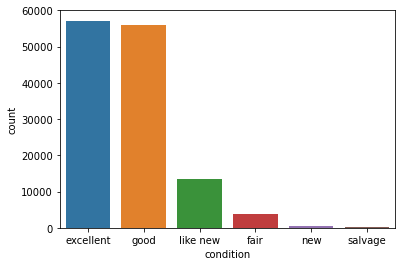

In [149]:
ax = sns.countplot(x='condition',data=cars_1,order=cars_1['condition'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10);

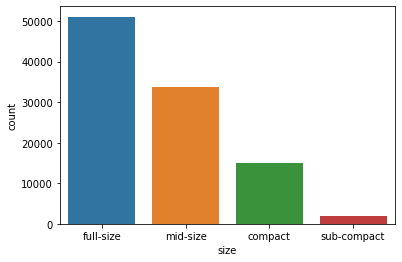

In [150]:
ax = sns.countplot(x='size',data=cars_1,order=cars_1['size'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10);

According to bar plots above, we can fill **condition** with **good** quality because it is a common type of condition, while being more neutral than *excellent* or *like new*. As for **size**, it is better to delete this column because it has too many missing data.

In [151]:
cars_1.condition.fillna('good', inplace = True)
cars_1 = cars_1.drop(labels = ['size'], axis = 1)

num_rows = len(cars_1)
display(cars_1.isna().sum()*100/num_rows)

C:\Users\DLect\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


region          0.0
price           0.0
year            0.0
manufacturer    0.0
model           0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
drive           0.0
type            0.0
paint_color     0.0
description     0.0
state           0.0
posting_date    0.0
dtype: float64

We finished with NaNs. Now, we are going to do something else. We'll retrieve year and month of **posting_date**.

In [152]:
import datetime

cars_1['posting_date'] = pd.to_datetime(cars_1['posting_date'], utc=True)

cars_1['posting_year'] = pd.DatetimeIndex(cars_1['posting_date']).year

cars_1['posting_month'] = pd.DatetimeIndex(cars_1['posting_date']).month

cars_1 = cars_1.drop(labels = ['posting_date'], axis = 1)
cars_1.head(3)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,posting_year,posting_month
3,auburn,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,pickup,blue,1974 chev. truck (LONG BED) NEW starter front ...,al,2020,12
4,auburn,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,pickup,blue,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,2020,12
6,auburn,39990,2012.0,ford,mustang shelby gt500 coupe,good,8 cylinders,gas,9692.0,clean,other,rwd,coupe,blue,Carvana is the safer way to buy a car During t...,al,2020,11


We want to delete **description** because it is described in other variables and provide too much details.

In [153]:
cars_1 = cars_1.drop(labels = ['description'], axis = 1)

cars_1.shape

(178409, 17)

Finally, let's check for correlation of our columns.

2020    178409
Name: posting_year, dtype: int64

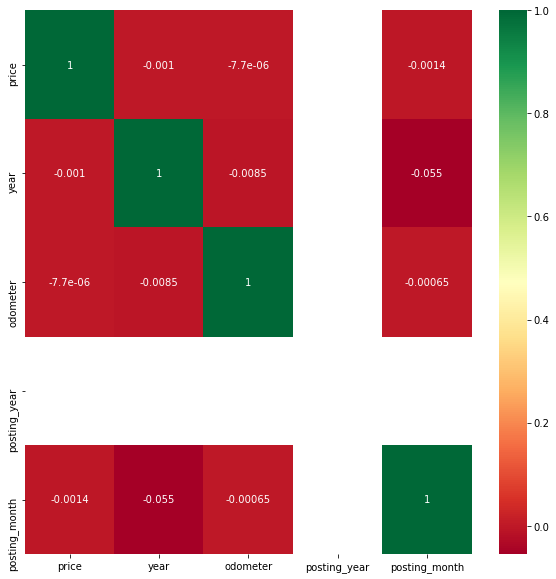

In [154]:
corrmat = cars_1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
hm = sns.heatmap(corrmat,
                 cbar=True, annot=True, cmap="RdYlGn")

cars_1['posting_year'].value_counts()

Although, posting_year has no information about correlation, it's all right! It seems that year has only one unique value! Let's drop it as well.

In [155]:
cars_1 = cars_1.drop(labels = ['posting_year'], axis = 1)

cars_1.shape

(178409, 16)

## Visualization

Here comes more interesting part. Let's take a look at distribution of our prices.

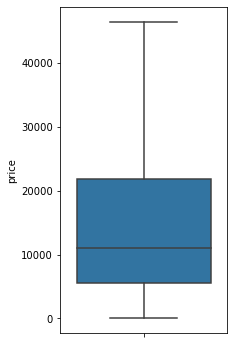

In [156]:
plt.figure(figsize=(3,6))
sns.boxplot(y='price', data=cars_1,showfliers=False);

Without outliers this is a typical distribution of car's prices. Perhaps, we need to delete those that are more than 100K. Let's do it!

(178260, 16)
Skewness: 1.326072
Kurtosis: 2.164638
14900.044973634018


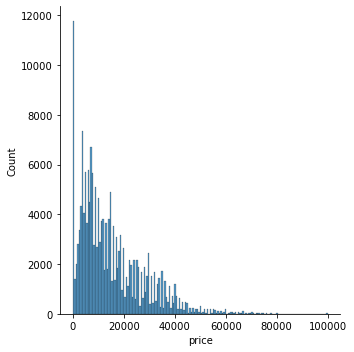

In [157]:
cars_1 = cars_1[cars_1['price'] <= 100000]

sns.displot(data = cars_1, x = 'price', log_scale = False)

print(cars_1.shape)
print("Skewness: %f" % cars_1['price'].skew())
print("Kurtosis: %f" % cars_1['price'].kurt())
print(st.mean(cars_1['price']))

Also, check skewness of odometer.

In [158]:
print("Skewness: %f" % cars_1['odometer'].skew())
print("Maximum: %f" % cars_1['odometer'].max())
print("Mean: %f" % cars_1['odometer'].mean())
print("Median: %f" % cars_1['odometer'].median())

Skewness: 421.731655
Maximum: 2043755555.000000
Mean: 112701.163048
Median: 94200.000000


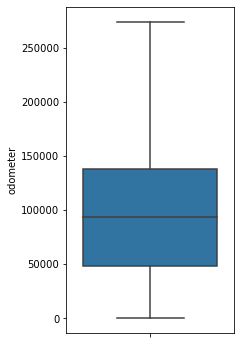

In [159]:
plt.figure(figsize=(3,6))
sns.boxplot(y='odometer', data=cars_1,showfliers=False);

The distribution of prices is right-skewed, so it means that the majority of cars have been sold for less than the average value of \\$14900, considering deleted outliers. But the distribution of odometer is very highly right-skewed, so we must do some transformation later. For now, let's delete values in **odometer** that are more than 1M.

In [160]:
cars_1 = cars_1[cars_1['odometer'] <= 1000000]

print("Skewness: %f" % cars_1['odometer'].skew())

Skewness: 1.601766


It is interesting how car's prices are distributed by year. We want to draw a line plot.

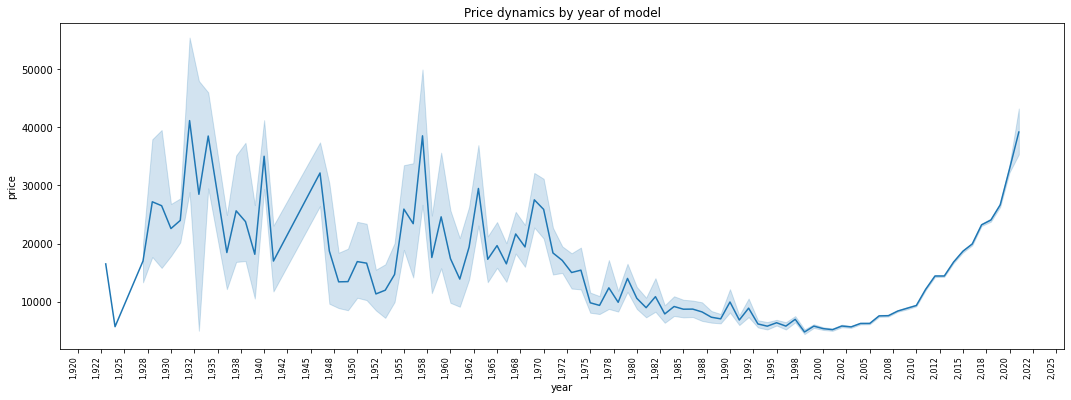

In [161]:
import matplotlib.ticker as mticker


plt.subplots(figsize=(18,6))
label_format = '{:,.0f}'
ax = sns.lineplot(x='year', y='price', data=cars_1);

ax.xaxis.set_major_locator(mticker.MaxNLocator(50))
ticks_loc = ax.get_xticks().tolist()
ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_xticklabels([label_format.format(x) for x in ticks_loc])

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=8);
plt.title("Price dynamics by year of model");

Finally, let's find out average price by type of automobile.

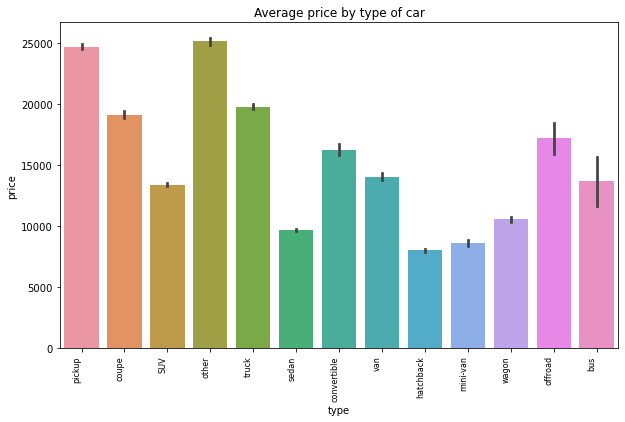

In [162]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='type', y='price', data=cars_1);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=8);
plt.title("Average price by type of car");

## Modelling

Time to model! First of all, we need to replace all text categorical variables to numbers.

In [163]:
cars_1.region = pd.Categorical(cars_1.region)
cars_1['region'] = cars_1.region.cat.codes

cars_1.manufacturer = pd.Categorical(cars_1.manufacturer)
cars_1['manufacturer'] = cars_1.manufacturer.cat.codes

cars_1.model = pd.Categorical(cars_1.model)
cars_1['model'] = cars_1.model.cat.codes

cars_1.condition = pd.Categorical(cars_1.condition)
cars_1['condition'] = cars_1.condition.cat.codes

cars_1.cylinders = pd.Categorical(cars_1.cylinders)
cars_1['cylinders'] = cars_1.cylinders.cat.codes

cars_1.fuel = pd.Categorical(cars_1.fuel)
cars_1['fuel'] = cars_1.fuel.cat.codes

cars_1.title_status = pd.Categorical(cars_1.title_status)
cars_1['title_status'] = cars_1.title_status.cat.codes

cars_1.transmission = pd.Categorical(cars_1.transmission)
cars_1['transmission'] = cars_1.transmission.cat.codes

cars_1.drive = pd.Categorical(cars_1.drive)
cars_1['drive'] = cars_1.drive.cat.codes

cars_1.type = pd.Categorical(cars_1.type)
cars_1['type'] = cars_1.type.cat.codes

cars_1.paint_color = pd.Categorical(cars_1.paint_color)
cars_1['paint_color'] = cars_1.paint_color.cat.codes

cars_1.state = pd.Categorical(cars_1.state)
cars_1['state'] = cars_1.state.cat.codes

cars_1.year = pd.Categorical(cars_1.year)
cars_1['year'] = cars_1.year.cat.codes

cars_1.head(2)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,posting_month
3,16,2000,44,7,2636,2,3,2,190000.0,0,0,2,8,1,1,12
4,16,19500,75,13,6243,0,6,0,116000.0,1,0,0,8,1,1,12


Then, we need to take log out of **price** and **odometer** because they are highly right-skewed. Also, we want to remove **model** because it has too many models, which can lead to overfitting.

In [164]:
#cars_1['price'] = np.log(cars_1['price']+1)
#cars_1['odometer'] = np.log(cars_1['odometer']+1)
cars_1 = cars_1.drop(labels = ['model'], axis = 1)

cars_1.head(2)

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,posting_month
3,16,2000,44,7,2,3,2,190000.0,0,0,2,8,1,1,12
4,16,19500,75,13,0,6,0,116000.0,1,0,0,8,1,1,12


Now, we need to split our dataset to training and testing sets. Then, we will use StandardScaler in order to normalize data.

In [165]:
y = cars_1['price']
X = cars_1.drop(columns=['price'])

X.head(2)

,region,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,posting_month
3,16,44,7,2,3,2,190000.0,0,0,2,8,1,1,12
4,16,75,13,0,6,0,116000.0,1,0,0,8,1,1,12


In [166]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

sc_x = StandardScaler()
X_std = sc_x.fit_transform(X)
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X_std, y,random_state=0, test_size = .2)

Because we are going to predict continuous variable, our task is regression, so we must use regressors. The following options are available: 

* Linear Regression

* Lasso

* ElasticNet

* Tree-based regressors

* Boosting regressors

We are not going to use SVR here because it takes too long time, considering our dataset. Let's create pipeline and add several regressors to it!

Train set R^2:
('Scaled-LR', 0.45955363275546757, 0.002587875342633485)
('Scaled-LASSO', 0.45955427294945517, 0.0025879571897727697)
('Scaled-EN', 0.41855869229135, 0.0034084467230550233)
('Scaled-CART', 0.7207713374099899, 0.0031480792744987772)


[Text(1, 0, 'Scaled-LR'),
 Text(2, 0, 'Scaled-LASSO'),
 Text(3, 0, 'Scaled-EN'),
 Text(4, 0, 'Scaled-CART')]

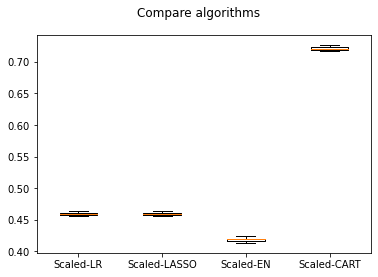

In [169]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

pipelines = []
pipelines.append(('Scaled-LR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('Scaled-LASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('Scaled-EN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('Scaled-CART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))

results_train = []
names_train = []


print('Train set R^2:')  

for name, model in pipelines:
    cross_val_result = cross_val_score(model, X_train, y_train, cv = 5, scoring='r2')
    results_train.append(cross_val_result)
    names_train.append(name)
    text = (name, cross_val_result.mean(), cross_val_result.std())
    print(text)


fig = plt.figure()
fig.suptitle('Compare algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results_train)
ax.set_xticklabels(names_train)

The best algorithm is CART because it has the highest R^2 and pretty low variance. Then, let's test more sophisticated algorithms.

('Scaled-AB', 0.2717402785754322, 0.135030371737542)
('Scaled-GBM', 0.6712434082410674, 0.005239769936589069)
('Scaled-RF', 0.8549979637865028, 0.0033908017089084837)
('Scaled-ET', 0.8677676722871768, 0.003680628959630432)


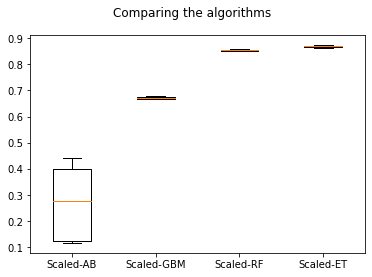

In [171]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

# попробуем другие регрессоры
ensembles = []
ensembles.append(('Scaled-AB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('Scaled-GBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('Scaled-RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('Scaled-ET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))
results = []
names = []

from sklearn.model_selection import cross_val_score

results = []
names = []

for name, model in ensembles:
    cross_val_result = cross_val_score(model, X_train, y_train, cv = 5, scoring='r2')
    results.append(cross_val_result)
    names.append(name)
    text = (name, cross_val_result.mean(), cross_val_result.std())
    print(text)
    
    
fig = plt.figure()
fig.suptitle('Comparing the algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

And the winner is...**ExtraTreeRegressor**. Congratulations!

## Key findings

During our research we found out that the worst performers on this dataset are **ElasticNet** and **AdaBoost**, while the best performer is **ExtraTreeRegressor**. We consider the result of R^2 = 0.87 really precise, based on our variables, because car prices can be really harder to predict than, let's say, physical processes. Also, we have the following findings:

* The lowest prices have cars from 1995 to 2005 year of model

* Most expensive cars are pickups and least expensive are hetchbacks and minivans.

* There are a lot of cars with odometer ranging from 50000 to 150000.